# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [65]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from numpy import linalg as la

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [66]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

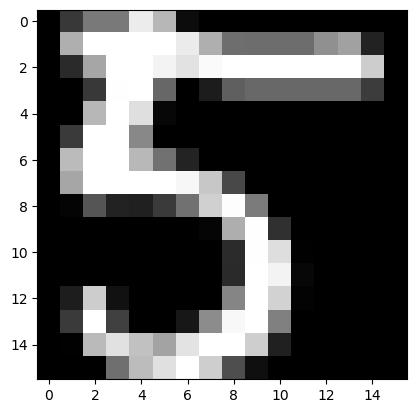

In [67]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

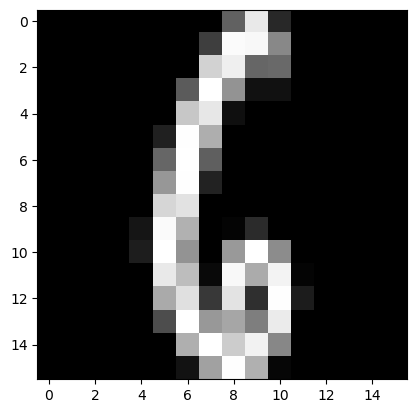

In [68]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [69]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train
class_test = np.ones((N_test,1))   # label 1 for digit 6
class_test[:len(train_5[145:,:])] = 0   

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [70]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

### Display the averaged images of 5 & 6 respectively

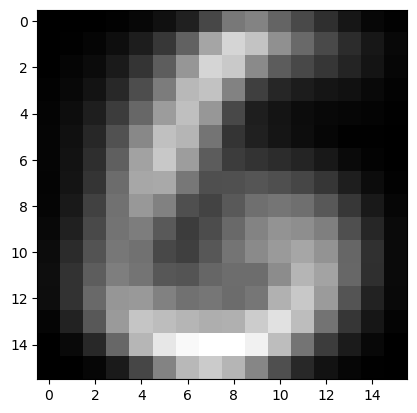

In [71]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

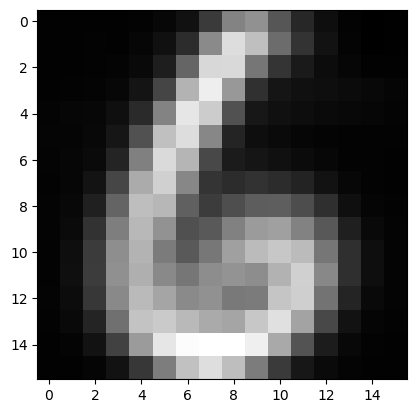

In [72]:
n=12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.

- L'ACP prend en entrée le nombre de composantes à conserver. Dans l'exemple ci-dessus, ce paramètre n'a pas été spécifié, ce qui signifie que toutes les composantes de la décomposition ont été conservées.

- Les données utilisées pour déterminer les composantes les plus importantes sont fournies à la fonction fit.

- Une fois que le modèle ACP est ajusté aux données, on peut récupérer les directions de la projection avec l'attribut components_.

- Ces directions correspondent aux vecteurs propres de la matrice obtenue par la décomposition en valeurs singulières. Les valeurs propres correspondantes peuvent être obtenues avec l'attribut eigenvalues.


2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.


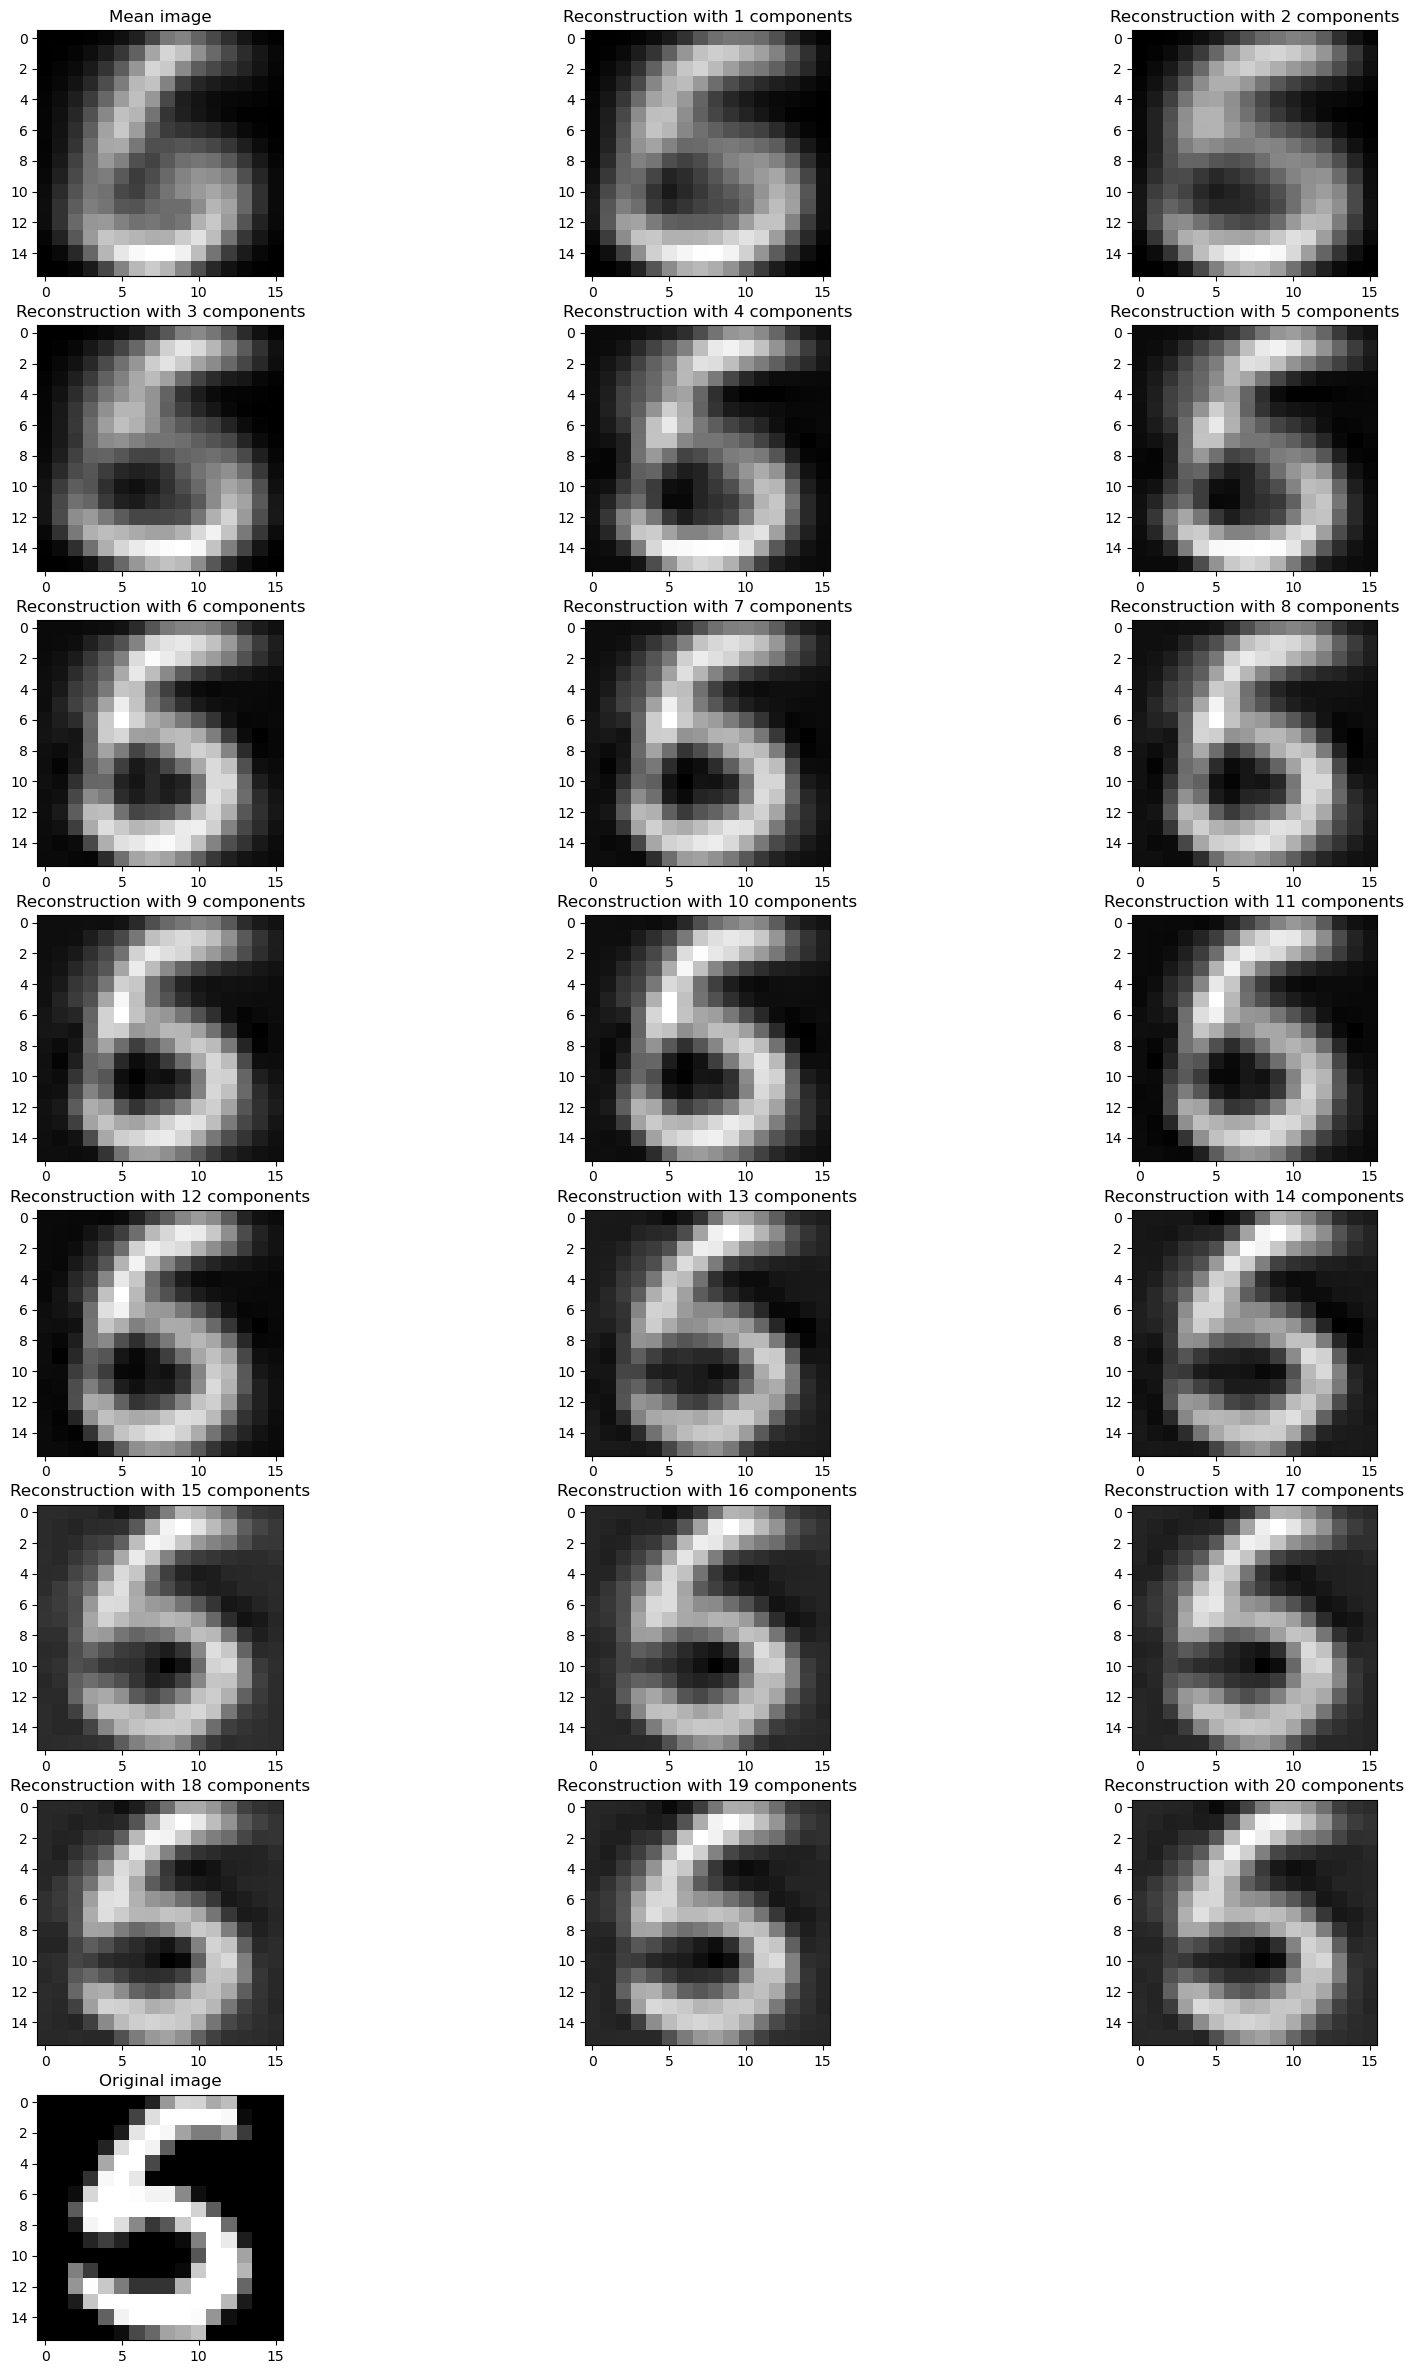

In [73]:
def projection_reconstruct(image_index, n_components, mean_train, projection, components):
     
    plt.figure(figsize=(20,30))
    axis = plt.subplot(n_components//3+2,3,1)
    mean_image = np.reshape(mean_train,(16,16))
    image = np.copy(mean_image)
    axis.imshow(image,cmap='gray')
    axis.set_title("Mean image")
    
    
    for i in range(n_components):    
        axis = plt.subplot(n_components//3+2,3,i+2)
        image += projection[image_index, i]*np.reshape(components[i,:],(16,16))    
        axis.imshow(image,cmap='gray')
        axis.set_title("Reconstruction with %d components" % (i+1))
        
    axis = plt.subplot(n_components//3+2,3,n_components+2)
    original =  np.reshape(x_train_brut[image_index,:],(16,16))
    axis.imshow(original,cmap='gray')
    axis.set_title("Original image")
    plt.show()

        
image_index = 5
projection_reconstruct(image_index, 20, moy_train, proj, comp)

__Remarque:__ On remarque que plus on ajout de composantes principales, plus l'image reconstruite est proche de l'image originale. Dans une question importante est de savoir combien de composantes principales sont nécessaires pour reconstruire une image avec une bonne précision.


3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?

__Réponse:__ Pour trouver le nombre de composantes nécessaires on va tester trois critères différents:

- __Part d'inerti expliquée :__ on va chercher le nombre de composantes qui permet d'expliquer 80% de l'inertie totale.


Nombre total d'axes à retenir est :  88
Le pourcentage des composantes retenues est :  34.375 %


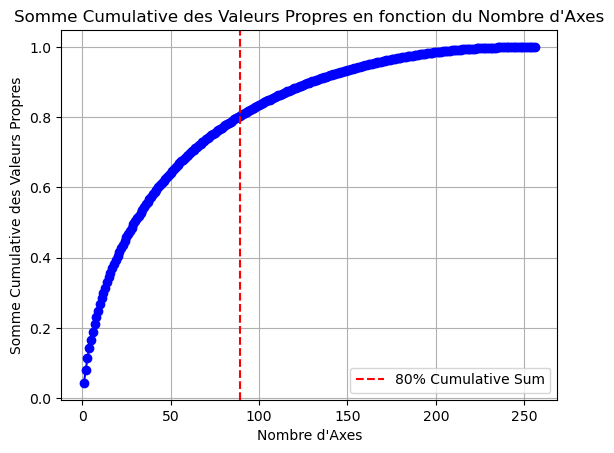

In [74]:
# Calcul de la somme cumulative des valeurs propres normalisée pour avoir des pourcentages 
cumulative_sum = np.cumsum(singval) / np.sum(singval)

# Trouver l'indice où la somme cumulative atteint ou dépasse 70%
indice_70_percent = np.argmax(cumulative_sum >= 0.8)

# Nombre total d'axes
total_axes = len(singval)

print("Nombre total d'axes à retenir est : ", indice_70_percent)
print("Le pourcentage des composantes retenues est : ", indice_70_percent/len(singval) *100,"%")
# Création du graphique
plt.plot(range(1, total_axes + 1), cumulative_sum, marker='o', linestyle='-', color='b')
plt.axvline(x=indice_70_percent + 1, color='r', linestyle='--', label='80% Cumulative Sum')
plt.title('Somme Cumulative des Valeurs Propres en fonction du Nombre d\'Axes')
plt.xlabel('Nombre d\'Axes')
plt.ylabel('Somme Cumulative des Valeurs Propres')
plt.legend()
plt.grid(True)
plt.show()


- __Critère de Kaiser :__ on gardera les composantes dont la valeur propre est supérieure à la moyenne des valeurs propres.


In [75]:
# Moyenne des valeurs propres 
moy_singval = np.mean(singval)
# Indices des valeurs propres retenues 
indices_sup_moy = np.where(singval > moy_singval)[0]

print("le nombre de valeurs propres supérieures à la moyenne est :", len(indices_sup_moy))
print("Le pourcentage de valeurs propres à retenir suivant le critère de Kaiser est :", len(indices_sup_moy)/len(singval) *100,"%")

le nombre de valeurs propres supérieures à la moyenne est : 71
Le pourcentage de valeurs propres à retenir suivant le critère de Kaiser est : 27.734375 %



- __Critère du coude :__ on va chercher le nombre de composantes qui permet de maximiser la pente de la courbe de la part d'inertie expliquée.

Text(0.5, 1.0, 'Valeurs Propres')

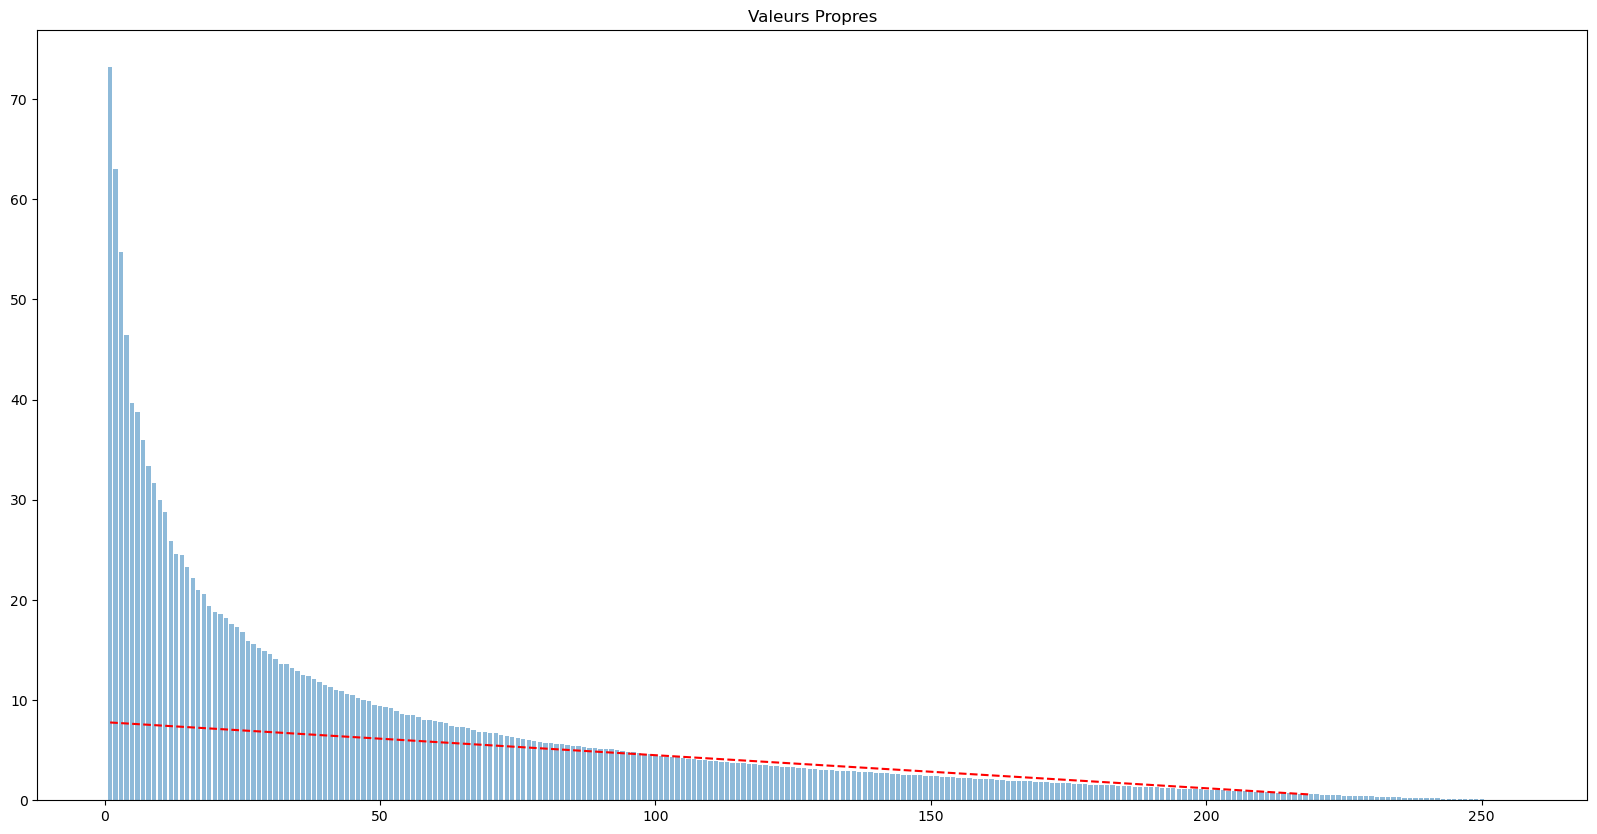

In [76]:
plt.figure(figsize=(20,10))
plt.bar(range(1, len(singval) + 1), singval, align='center', alpha=0.5)
x = np.arange(1, 220)
y = -0.033*x + 7.8
plt.plot(x, y, color='r', linestyle='--', label='Moyenne')
plt.title('Valeurs Propres')

- D'après le critère de la caude et à l'aide de graphique on garde environ 70 composantes

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


1. Nuage de points associé à 5 et 6 :

Text(463.154761904762, 0.5, '2nd Component')

<Figure size 800x900 with 0 Axes>

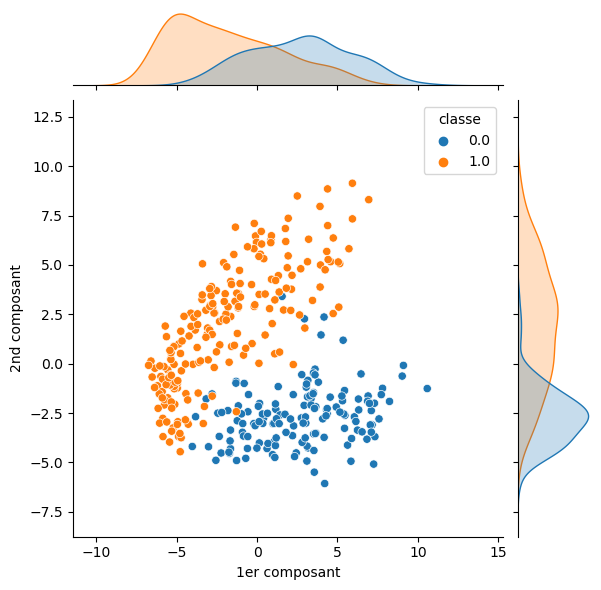

In [77]:
# Exercise 2
plt.figure(figsize=(8,9))
data=pd.DataFrame(np.hstack((proj[:, :2], class_train)), columns=["1er composant", "2nd composant", "classe"])
sns.jointplot(data=data, x="1er composant", y="2nd composant", hue="classe")
plt.xlabel('1er Component')
plt.ylabel('2nd Component')

__Remaraque :__
- La première composante présente une répartition uniforme, avec une concentration notable entre -5 et 5.
- En ce qui concerne la deuxième composante, sa distribution est plus variée, marquée par la présence de nombreux points éloignés de la zone de concentration principale. Cette dernière est particulièrement concentrée entre -5 et 2.5, tandis que l'on observe une dispersion des points au-delà de 3.
- On remarque que les deux classses sont bien séparables linéairement.Dans ce cas, LDA et QDA sont des méthodes de classification adaptées à ce problème.

#### 3. Méthode de classification simple pour les digits 5 et 6 : 

Il est possible de discerner aisément les deux classes en se basant exclusivement sur les deux premiers composants. Cette approche à deux composants représente une solution économe pour le problème, réduisant le nombre de caractéristiques de 256 à seulement 2.

- Proposition de solution : 

Observant que la répartition des points ne s'éloigne pas considérablement d'une distribution normale, l'utilisation d'un modèle LDA ou QDA pourrait être envisagée. Étant donné que les distributions diffèrent entre les classes, nous anticipons une performance supérieure du modèle QDA par rapport au modèle LDA.

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LinearClassifier = LinearDiscriminantAnalysis(store_covariance=True)
LinearClassifier.fit(X=proj[:, :2],y=class_train[:,0])

# accuracy de modèle
print("accuracy de modèle pour entrainement est :", LinearClassifier.score(proj[:, :2],class_train[:,0]).round(2))
print("accuracy de modèle pour test est :", LinearClassifier.score(pca.transform(x_test_brut)[:, :2],class_test[:,0]).round(2))

accuracy de modèle pour entrainement est : 0.96
accuracy de modèle pour test est : 0.82


In [80]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QuadraticClassifier = QuadraticDiscriminantAnalysis(store_covariance=True)
QuadraticClassifier.fit(X=proj[:, :2],y=class_train[:,0])

print("Erreur d'entrainement avec QDA en utilisant les 2 composants : ",  LinearClassifier.score(proj[:, :2],class_train[:,0]).round(2))
print("Erreur de test avec  QDA : ", QuadraticClassifier.score(pca.transform(x_test_brut)[:, :2], class_test[:,0]).round(2))

Erreur d'entrainement avec QDA en utilisant les 2 composants :  0.96
Erreur de test avec  QDA :  0.85


- Comme anticipé, le modèle QDA affiche une performance supérieure à celle du modèle LDA.
- En faisant une comparaison avec les résultats obtenus lors du précédent TP sur la régression logistique, on observe que l'utilisation des deux premiers composants de l'ACP (PCA) comme données pourrait conduire à des résultats similaires, que l'on opte pour un modèle QDA ou LDA.

#### Conclusions : 


Il est clair que l'étape de PCA  simplifie considérablement la classification. Dans le cadre du TP avec des photos de chiffres manuscrits 5 et 6, l'utilisation seulement des deux premières composantes de la PCA permet de classifier efficacement ces deux chiffres. Cette réduction dimensionnelle facilite la tâche de classification tout en préservant l'information discriminante nécessaire pour distinguer les chiffres 5 et 6.

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    